In [1]:
%matplotlib notebook
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

###### FUNCTIONS #################################################################################
#weight function
def w_f(x,xI,y,yI,dmi,beta):
    r = np.sqrt( (x - xI)**2 + (y - yI)**2 ) / dmi
#     r = np.linalg.norm()
    
    if r <= 1:
        return (np.exp( (-r**2)*(beta**2) ) - np.exp(-beta**2) ) / (1 - np.exp(-beta**2))
    
    else:
        return 0
    

#################### SET THE BASIS HERE !!!!!
def create_design_matrix(x,y):
    xx, yy = np.meshgrid(x,y)
    
    xx_flat = xx.ravel().reshape(-1,1)
    yy_flat = yy.ravel().reshape(-1,1)
    
    ones_col = np.ones(len(xx_flat))
    ones_col = ones_col.reshape(-1,1)
    
    basis_to_P = (ones_col,xx_flat,yy_flat)
    P  = np.hstack(basis_to_P)
    return P


def get_unknowns_combinations(unknown_xs, unknown_ys):
    unk_xx, unk_yy = np.meshgrid(unknown_xs, unknown_ys)
    
    unk_xx = unk_xx.ravel().reshape(-1,1)
    unk_yy = unk_yy.ravel().reshape(-1,1)
    
    return unk_xx, unk_yy
    
##############################################################################################

#### Importing data 

In [2]:
df1 = pd.read_excel('C:\\Users\\viliam\\Desktop\\E.xlsx',header=None)
df2 = pd.read_excel('C:\\Users\\viliam\\Desktop\\B.xlsx',header=None)

dataE = df2.to_numpy()
dataB = df2.to_numpy()

x = np.arange(0,130,5)
y = np.arange(0,55,5)
xx, yy = np.meshgrid(x,y)
f = dataE.T.ravel().reshape(-1,1)

# x = np.array(x).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

print('x shape:',x.shape)
print('y shape:',y.shape)
print('E shape:',dataE.shape)

x shape: (26,)
y shape: (11,)
E shape: (26, 11)


#### Plot interpolation 

<IPython.core.display.Javascript object>


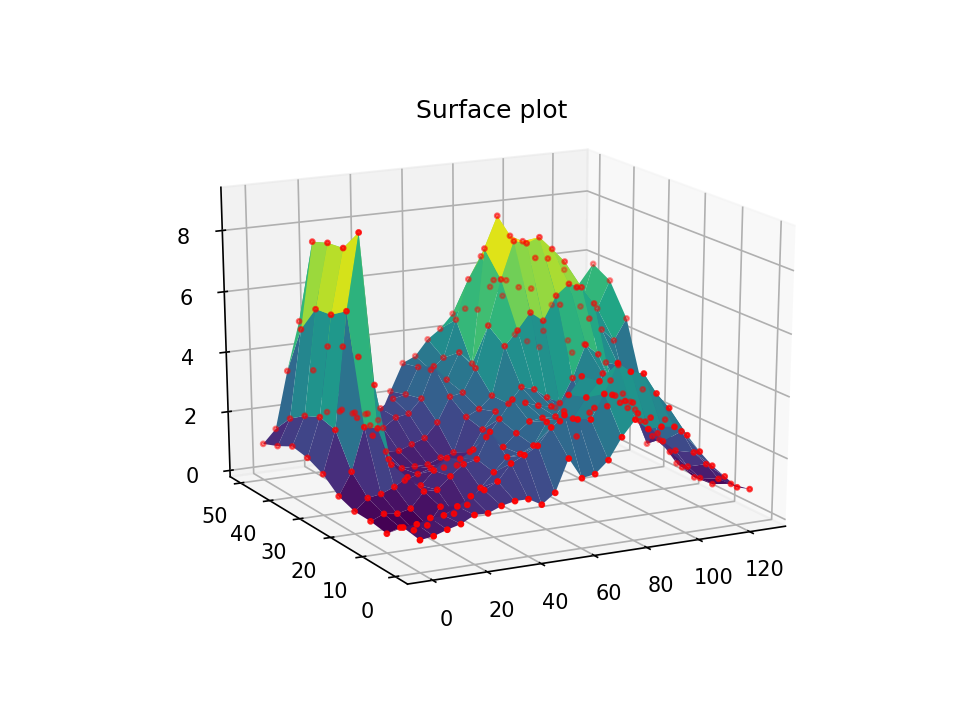

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, dataE.T,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.scatter(xx, yy, dataE.T, c='r',marker='.')
plt.show()

#### Pick an area for approximation

In [4]:
#these are unknowns, their f(x,y) will be approximated
unknowns_x = np.arange(0,126)
unknowns_y = np.arange(0,51)
unk_xx, unk_yy = get_unknowns_combinations(unknowns_x, unknowns_y)

#### MLS in action

In [5]:
#setting parameters of weighting func.
h = 1
dmi = 15*h
beta = 3

#create design matrix -> our model is going to "learn" from all all observations;
#shape based on chosen polynome; first column = always ones
P = create_design_matrix(x,y)

#create array for f(x,y) approximations 
approx_arr = np.array([])

#loop over every combination of unknowns in our area of approximation
for x,y in zip(unk_xx,unk_yy):
    
    #POKUSIT SE VEKTORIZOVAT !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    W_arr = np.array([])
    for node in P:
        xI, yI = node[1], node[2]
        w = w_f(x,xI,y,yI,dmi,beta)
        W_arr = np.append(W_arr, w)
    
        

    W = np.diag(W_arr)
    A = np.dot(np.dot(P.T,W),P)
    A_inv = np.linalg.pinv(A)
    B = np.dot(P.T,W)
    
    p = np.hstack([1, x, y])
    shape_func = np.dot(np.dot(p,A_inv),B)
    
    approx_arr = np.append(approx_arr,shape_func.dot(f))

#### Plotting the results of MLS fit 

<IPython.core.display.Javascript object>


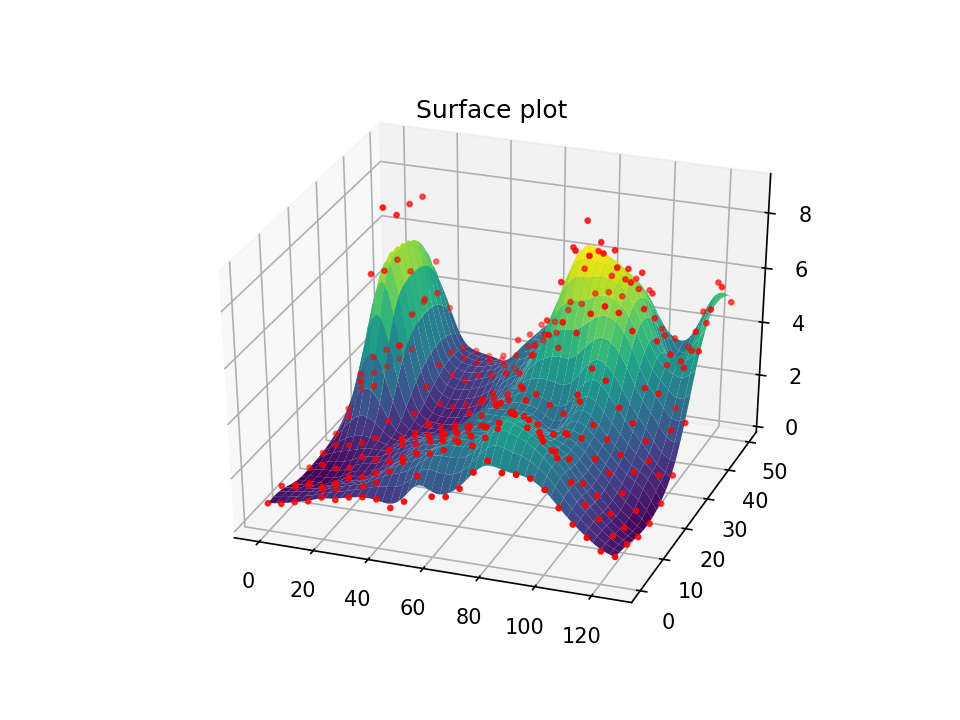

In [6]:
aproximation = approx_arr.reshape(51,126)
unk_xx_plot, unk_yy_plot = np.meshgrid(unknowns_x, unknowns_y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(unk_xx_plot, unk_yy_plot, aproximation,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')

ax.scatter(xx, yy, dataE.T,c='r',marker='.')
plt.show()